In [18]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [22]:
d1 = pd.read_csv("../results/results_combined_1.csv", index_col=0)
d2 = pd.read_csv("../results/results_combined_4.csv", index_col=0)

In [23]:
d1.sort_values("f1_detected_cps_at_y", ascending=False)

,dataset,algorithm,config,runtime_x,percent_changes_detected_x,f1_detected_cps_at_x,precision_x,recall_x,actual_cps,detected_cps,detected_cps_at,runtime_y,percent_changes_detected_y,f1_detected_cps_at_y,precision_y,recall_y,mean_until_detection
9,HAR,NewMA,"$wsize=100, forget_factor=0.05, thresholding_q...",6.748491,320.000000,0.444444,0.291667,0.933333,"[1406, 3183, 5127, 7033, 8577]",[],"[1407, 1408, 1409, 1410, 1854, 1855, 3186, 646...",7.300256,320.000000,0.476190,0.312500,1.0,296.800000
10,HAR,NewMA,"$wsize=100, forget_factor=0.05, thresholding_q...",6.748491,320.000000,0.444444,0.291667,0.933333,"[1406, 3183, 5127, 7033, 8577]",[],"[1407, 1408, 1409, 1410, 1854, 1855, 3186, 477...",6.421125,320.000000,0.476190,0.312500,1.0,290.600000
11,HAR,NewMA,"$wsize=100, forget_factor=0.05, thresholding_q...",6.748491,320.000000,0.444444,0.291667,0.933333,"[1406, 3183, 5127, 7033, 8577]",[],"[1407, 1408, 1409, 1410, 1854, 1855, 3186, 703...",6.524091,320.000000,0.380952,0.250000,0.8,37.750000
12,MNIST,NewMA,"$wsize=50, forget_factor=0.05, thresholding_qu...",32.749662,788.888889,0.225211,0.126912,1.000000,"[6958, 14835, 21660, 27973, 35266, 42142, 4896...",[],"[953, 1884, 1885, 2175, 2830, 3008, 3476, 4092...",33.836762,755.555556,0.233766,0.132353,1.0,890.777778
7,Gas,NewMA,"$wsize=100, forget_factor=0.05, thresholding_q...",3.659954,786.666667,0.225741,0.127245,1.000000,"[1641, 3577, 6142, 7975, 10984]",[],"[327, 328, 329, 1778, 2027, 3580, 3921, 5225, ...",4.232389,760.000000,0.232558,0.131579,1.0,147.800000
6,Gas,NewMA,"$wsize=100, forget_factor=0.05, thresholding_q...",3.659954,786.666667,0.225741,0.127245,1.000000,"[1641, 3577, 6142, 7975, 10984]",[],"[221, 327, 328, 329, 1596, 1778, 2027, 2277, 3...",4.673950,780.000000,0.227273,0.128205,1.0,147.800000
13,MNIST,NewMA,"$wsize=50, forget_factor=0.05, thresholding_qu...",32.749662,788.888889,0.225211,0.126912,1.000000,"[6958, 14835, 21660, 27973, 35266, 42142, 4896...",[],"[277, 1484, 1884, 1885, 2175, 2830, 3027, 3362...",35.483929,788.888889,0.225000,0.126761,1.0,898.333333
8,Gas,NewMA,"$wsize=100, forget_factor=0.05, thresholding_q...",3.659954,786.666667,0.225741,0.127245,1.000000,"[1641, 3577, 6142, 7975, 10984]",[],"[221, 327, 328, 329, 1777, 1778, 2027, 2277, 3...",2.073524,820.000000,0.217391,0.121951,1.0,147.600000
14,MNIST,NewMA,"$wsize=50, forget_factor=0.05, thresholding_qu...",32.749662,788.888889,0.225211,0.126912,1.000000,"[6958, 14835, 21660, 27973, 35266, 42142, 4896...",[],"[276, 1483, 1484, 1629, 1884, 1885, 2558, 3362...",28.928296,822.222222,0.216867,0.121622,1.0,1013.888889
0,CIF,NewMA,"$wsize=20, forget_factor=0.05, thresholding_qu...",24.000161,1381.481481,0.136522,0.073321,1.000000,"[6000, 12000, 18000, 24000, 30000, 36000, 4200...",[],"[170, 1076, 3608, 5521, 6133, 6179, 6422, 6751...",23.853181,1266.666667,0.146341,0.078947,1.0,704.111111


In [3]:
d1.replace("MMDAW", "MMDEW", inplace=True)
d2.replace("MMDAW", "MMDEW", inplace=True)
d1.replace("NewMA", "NEWMA", inplace=True)
d2.replace("NewMA", "NEWMA", inplace=True)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

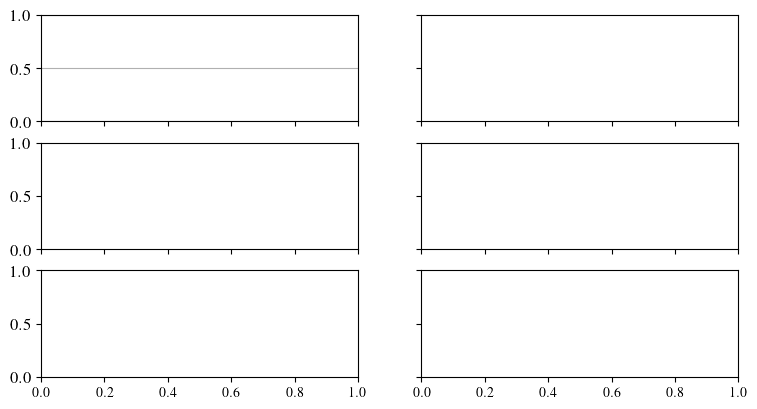

In [4]:
fig, ((ax11,ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3,2,figsize=(9,4.7),sharex=True,sharey=True)

def p(data,y,ax):
    bar_width = .12 #.18
    group_idx = np.arange(6) # number of datasets
    algorithms = ["MMDEW", "AdwinK", "D3", "IBDD", "NEWMA", "ScanB", "WATCH"]
    cs = sns.cubehelix_palette(7, start=0.5, rot=-.75, gamma=1.2)
    ax.grid(visible=None, axis="y")
    for i, a in enumerate(algorithms):
        x_vals = group_idx + i * bar_width
        y_vals =  data[data.algorithm == a].groupby("dataset")[y].mean()
        err = data[data.algorithm == a].groupby("dataset")[y].std()
        ax.bar(x_vals, y_vals, width = bar_width, edgecolor ='white', label = a, color = cs[i])
        ax.errorbar(x_vals, y_vals, yerr = err, fmt="none", ecolor="black")


        ax.set_ylim((0,1))
        ax.set_xticks([r + bar_width * 3 for r in group_idx], data.dataset.unique())
        ax.set_axisbelow(True)
        
p(data=d1, y="f1_detected_cps_at_y", ax=ax11)
p(data=d1, y="precision_y", ax=ax21)
p(data=d1, y="recall_y", ax=ax31)

p(data=d2, y="f1_detected_cps_at_y", ax=ax12)
p(data=d2, y="precision_y", ax=ax22)
p(data=d2, y="recall_y", ax=ax32)


ax11.set_ylabel("$F_1$")
ax21.set_ylabel("Precision")
ax31.set_ylabel("Recall")
ax31.set_xlabel("$\\beta = 1$")
ax32.set_xlabel("$\\beta = 1/4$")

Line, Label = ax11.get_legend_handles_labels()
fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.5, 1.06), ncol=7)
plt.tight_layout()
#plt.savefig("../article/figures/results.pdf", bbox_inches='tight')
plt.show()